# GROUP ASSIGNMENT - RMBA-2771 Fall 2025

Date: 23.09.2025 

Course: 2771 Research Methods for Business Analytics 

Instructor: Daniel Obermeier

Group: TXB B18

Henrik Peuker 72636

### Table of content

Select the hyperling to go to the respective section

- [1 Executive Summary](#1-executive-summary)
- [2 Introduction](#2-introduction)
- [3 Exploratory Analyis](#3-exploratory-analysis)
- [4 Method 1](#4-method-1)
- [5 Method 2](#5-method-2)
  - [5.1 Creating the model](#51-creating-the-model)
  - [5.2 Interpreting the outcome](#52-interpreting-the-outcome)
    - [5.2.1 Goodness-of-fit](#521-goodness-of-fit)
    - [5.2.2 Hypothesis testing](#522-hypothesis-testing)
    - [5.2.3 Odds ration](#523-odds-ratio)
- [6 Reflection on the use of AI](#6-reflection-on-the-use-of-ai)
- [7 Conclusion](#7-conclusion)


# 1. Executive Summary

# 2. Introduction

The data set "HR-Employee-Attrition" includes individual records of employees. Each row represents an individual employee, while the columns capture several demographic, educational, job-related and performance-related attributes. One of the main variables is Attrition, which shos if an employee has left the company. Attrition is recorded as a binary variable. 
The dataset includes variables such as age, gender, marital status, education level, job satisfaction, income. There is a mix of categorical, ordinal and numeric types which allows for a detailed analysis. 

When looking at the data set we have identified a novel, relevant and interesting research question regarding monthly income. 

The data set allows a thorough analysis what factors influence monthly income. To what extent do different job characteristics affect monthly income among employees? 

After having analysed the research question, job characteristics was separated into individual parts. Job characteristics might include travel frequency, satisfaction measures and working hours. 

Which led to the following two hypothesis: H1: Controlling for demographics, education, performance and role, travel frequency have a positive effect on income? 

To analyse the effect a ordinary least squares linear regression model was used. In order to create an identical person we included control metrics such as demographics, education, performance and role. 

# 3. Exploratory Analysis

In [4]:
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import skew 
from scipy.stats import kurtosis 
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing the data set and assigning it to the varible df 
df= pd.read_csv("HR-Employee-Attrition.csv")

In [6]:
# Creating a summary table to see the number of variable and the types to come up with a research question and get an overview of the data. 
summary_df = pd.DataFrame({
    "Variable": df.columns,
    "Type": [df[col].dtype.name for col in df.columns],
})

# Showing the summary, int64 are numerical values, whereas objects are categorical or binary values. We can indentify a diverse set of variables, including nominal(e.g. JobRole), ordinal(e.g. JobSatisfaction) and binary (e.g. attrition) variables.
print(summary_df)


                    Variable    Type
0                        Age   int64
1                  Attrition  object
2             BusinessTravel  object
3                  DailyRate   int64
4                 Department  object
5           DistanceFromHome   int64
6                  Education   int64
7             EducationField  object
8              EmployeeCount   int64
9             EmployeeNumber   int64
10   EnvironmentSatisfaction   int64
11                    Gender  object
12                HourlyRate   int64
13            JobInvolvement   int64
14                  JobLevel   int64
15                   JobRole  object
16           JobSatisfaction   int64
17             MaritalStatus  object
18             MonthlyIncome   int64
19               MonthlyRate   int64
20        NumCompaniesWorked   int64
21                    Over18  object
22                  OverTime  object
23         PercentSalaryHike   int64
24         PerformanceRating   int64
25  RelationshipSatisfaction   int64
2

In [7]:
#Looking at the first 20 rows to get a better understading of the data and detect some patterns and anomalies. 
pd.set_option('display.max_columns', None)
print(df.head(20))

    Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Tr

In [8]:
# Count unique values for the specified columns because we identified columns that are constant and therefore irrelevant for the analysis.
print("StandardHours value counts:")
print(df["StandardHours"].value_counts())

print("\nOver18 value counts:")
print(df["Over18"].value_counts())

print("\nEmployeeCount value counts:")
print(df["EmployeeCount"].value_counts())

# Checking for duplicates and missing values to ensure data quality. 
df.drop_duplicates(inplace=True)
print("After dropping duplicates:", df.shape)

print("Missing per column:\n", df.isnull().sum())


StandardHours value counts:
StandardHours
80    1470
Name: count, dtype: int64

Over18 value counts:
Over18
Y    1470
Name: count, dtype: int64

EmployeeCount value counts:
EmployeeCount
1    1470
Name: count, dtype: int64
After dropping duplicates: (1470, 35)
Missing per column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           

#### Histogram and Kernel Density Plot

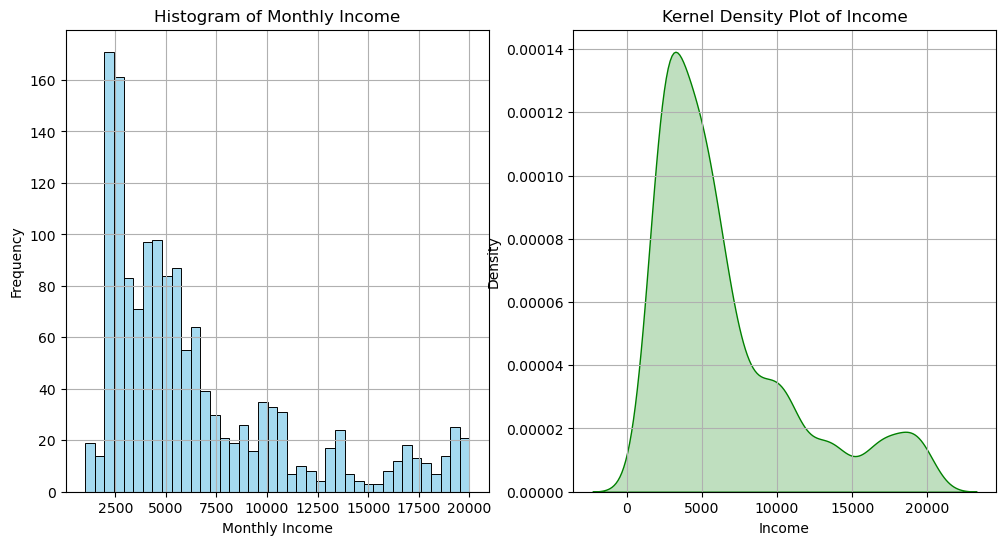

In [9]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyIncome'], bins=40, kde=False, color='skyblue')
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(df['MonthlyIncome'], fill=True, color='green')
plt.title('Kernel Density Plot of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)

### XXX Measures of central tendency

In [10]:
min_income = df['MonthlyIncome'].min()
max_income = df['MonthlyIncome'].max()
range_income = max_income - min_income

print("Income:")
print(f"  Min: {min_income}")
print(f"  Max: {max_income}")
print(f"  Range: {range_income}")

Income:
  Min: 1009
  Max: 19999
  Range: 18990


#### Mean, median, mode, quantiles

In [11]:
mean_income = df['MonthlyIncome'].mean()
median_income = df['MonthlyIncome'].median()
q25_income = df['MonthlyIncome'].quantile(0.25)
q75_income = df['MonthlyIncome'].quantile(0.75)
mode_income = df['MonthlyIncome'].mode()

print("Income:")
print(f"  Mean: {mean_income}")
print(f"  Median: {median_income}")
print(f"  25th percentile: {q25_income}")
print(f"  75th percentile: {q75_income}")
print(f"  Mode: {mode_income}")


Income:
  Mean: 6502.931292517007
  Median: 4919.0
  25th percentile: 2911.0
  75th percentile: 8379.0
  Mode: 0    2342
Name: MonthlyIncome, dtype: int64


#### Variance, standard deviation

In [12]:
income_variance = df['MonthlyIncome'].var()
income_std_dev = df['MonthlyIncome'].std()

print("Income:")
print(f"  Variance: {income_variance:.2f}")
print(f"  Standard Deviation: {income_std_dev:.2f}")

# Calculate the skewness 
print('  Skewness:', str(skew(df.MonthlyIncome, axis=0, bias=True)))
# Calculate the kurtosis 
print('  Kurtosis:', str(kurtosis(df.MonthlyIncome, axis=0, bias=True)))


Income:
  Variance: 22164857.07
  Standard Deviation: 4707.96
  Skewness: 1.3684185123330814
  Kurtosis: 0.9977379294765711


We can identify skewed data with more weight in the left tail of the distribution. Furthermore, we see a playkurtic distribution with fewer observations on the tails

In [13]:
df['MonthlyIncome_log2'] = np.log2(df['MonthlyIncome'])
df['MonthlyIncome_log10'] = np.log10(df['MonthlyIncome'])

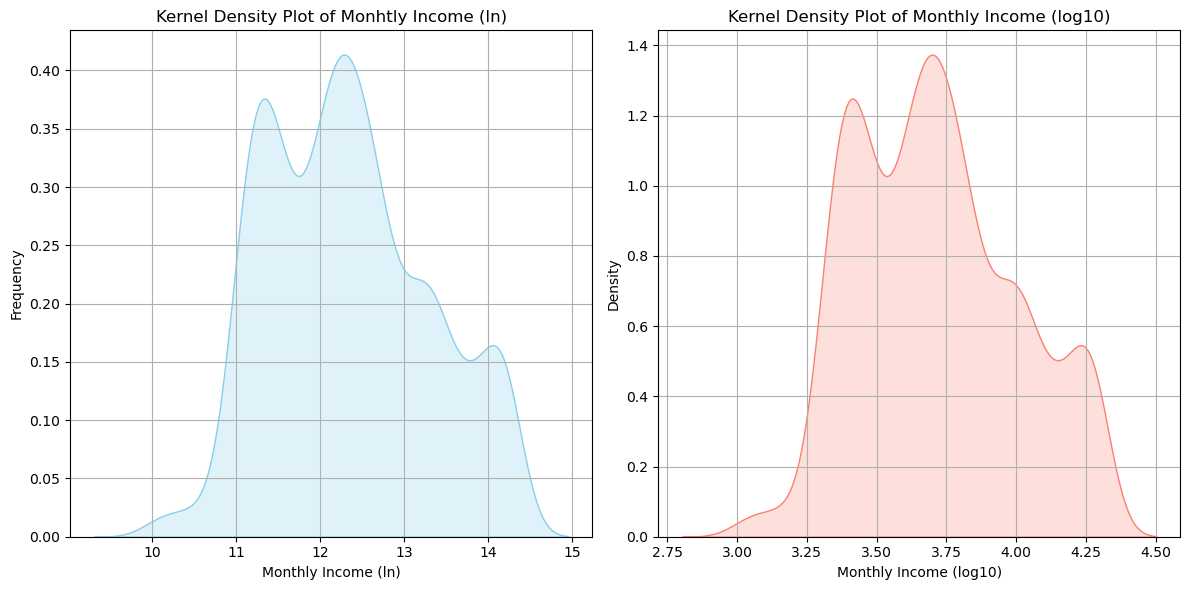

skewness ln transform: 0.28590017687202224
skewness log10 transform: 0.28590017687202623
kurtosis ln transform: -0.6992345608270574
kurtosis log10 transform: -0.6992345608270534


In [14]:
#INSTRUCTION: plot the kernel density plot of the log and ln transformed variable

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.kdeplot(df['MonthlyIncome_log2'], fill=True, color='skyblue')
plt.title('Kernel Density Plot of Monhtly Income (ln)')
plt.xlabel('Monthly Income (ln)')
plt.ylabel('Frequency')
plt.grid(True)

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['MonthlyIncome_log10'], fill=True, color='salmon')
plt.title('Kernel Density Plot of Monthly Income (log10)')
plt.xlabel('Monthly Income (log10)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()


# Calculate the skewness 
print('skewness ln transform:', str(skew(df.MonthlyIncome_log2, axis=0, bias=True)))
print('skewness log10 transform:', str(skew(df.MonthlyIncome_log10, axis=0, bias=True)))
# Calculate the kurtosis 
print('kurtosis ln transform:', str(kurtosis(df.MonthlyIncome_log2, axis=0, bias=True)))
print('kurtosis log10 transform:', str(kurtosis(df.MonthlyIncome_log10, axis=0, bias=True)))

The ln transformation is slightly more normal distributed than the log10 transformation.

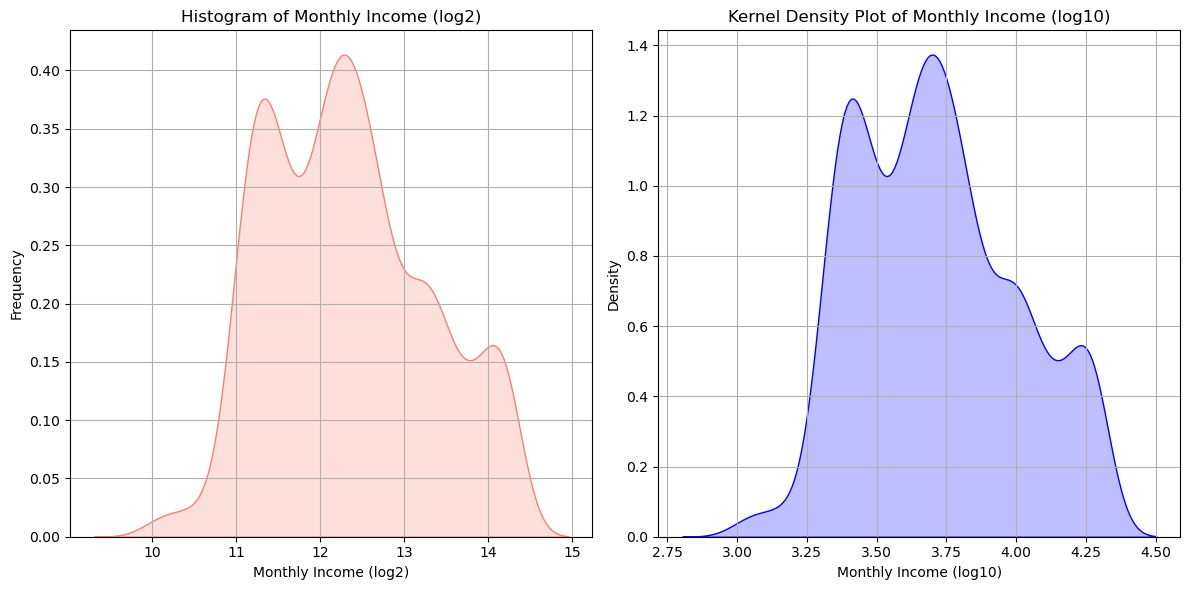

In [15]:
# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.kdeplot(np.log2(df['MonthlyIncome']), fill=True, color='salmon')
plt.title('Histogram of Monthly Income (log2)')
plt.xlabel('Monthly Income (log2)')
plt.ylabel('Frequency')
plt.grid(True)

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(np.log10(df['MonthlyIncome']), fill=True, color='blue')
plt.title('Kernel Density Plot of Monthly Income (log10)')
plt.xlabel('Monthly Income (log10)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

### XXX Correlations

#### Scatter plots

Text(0.5, 1.0, 'Correlation Heatmap of Income, Satisfaction, and Average Hours Watched')

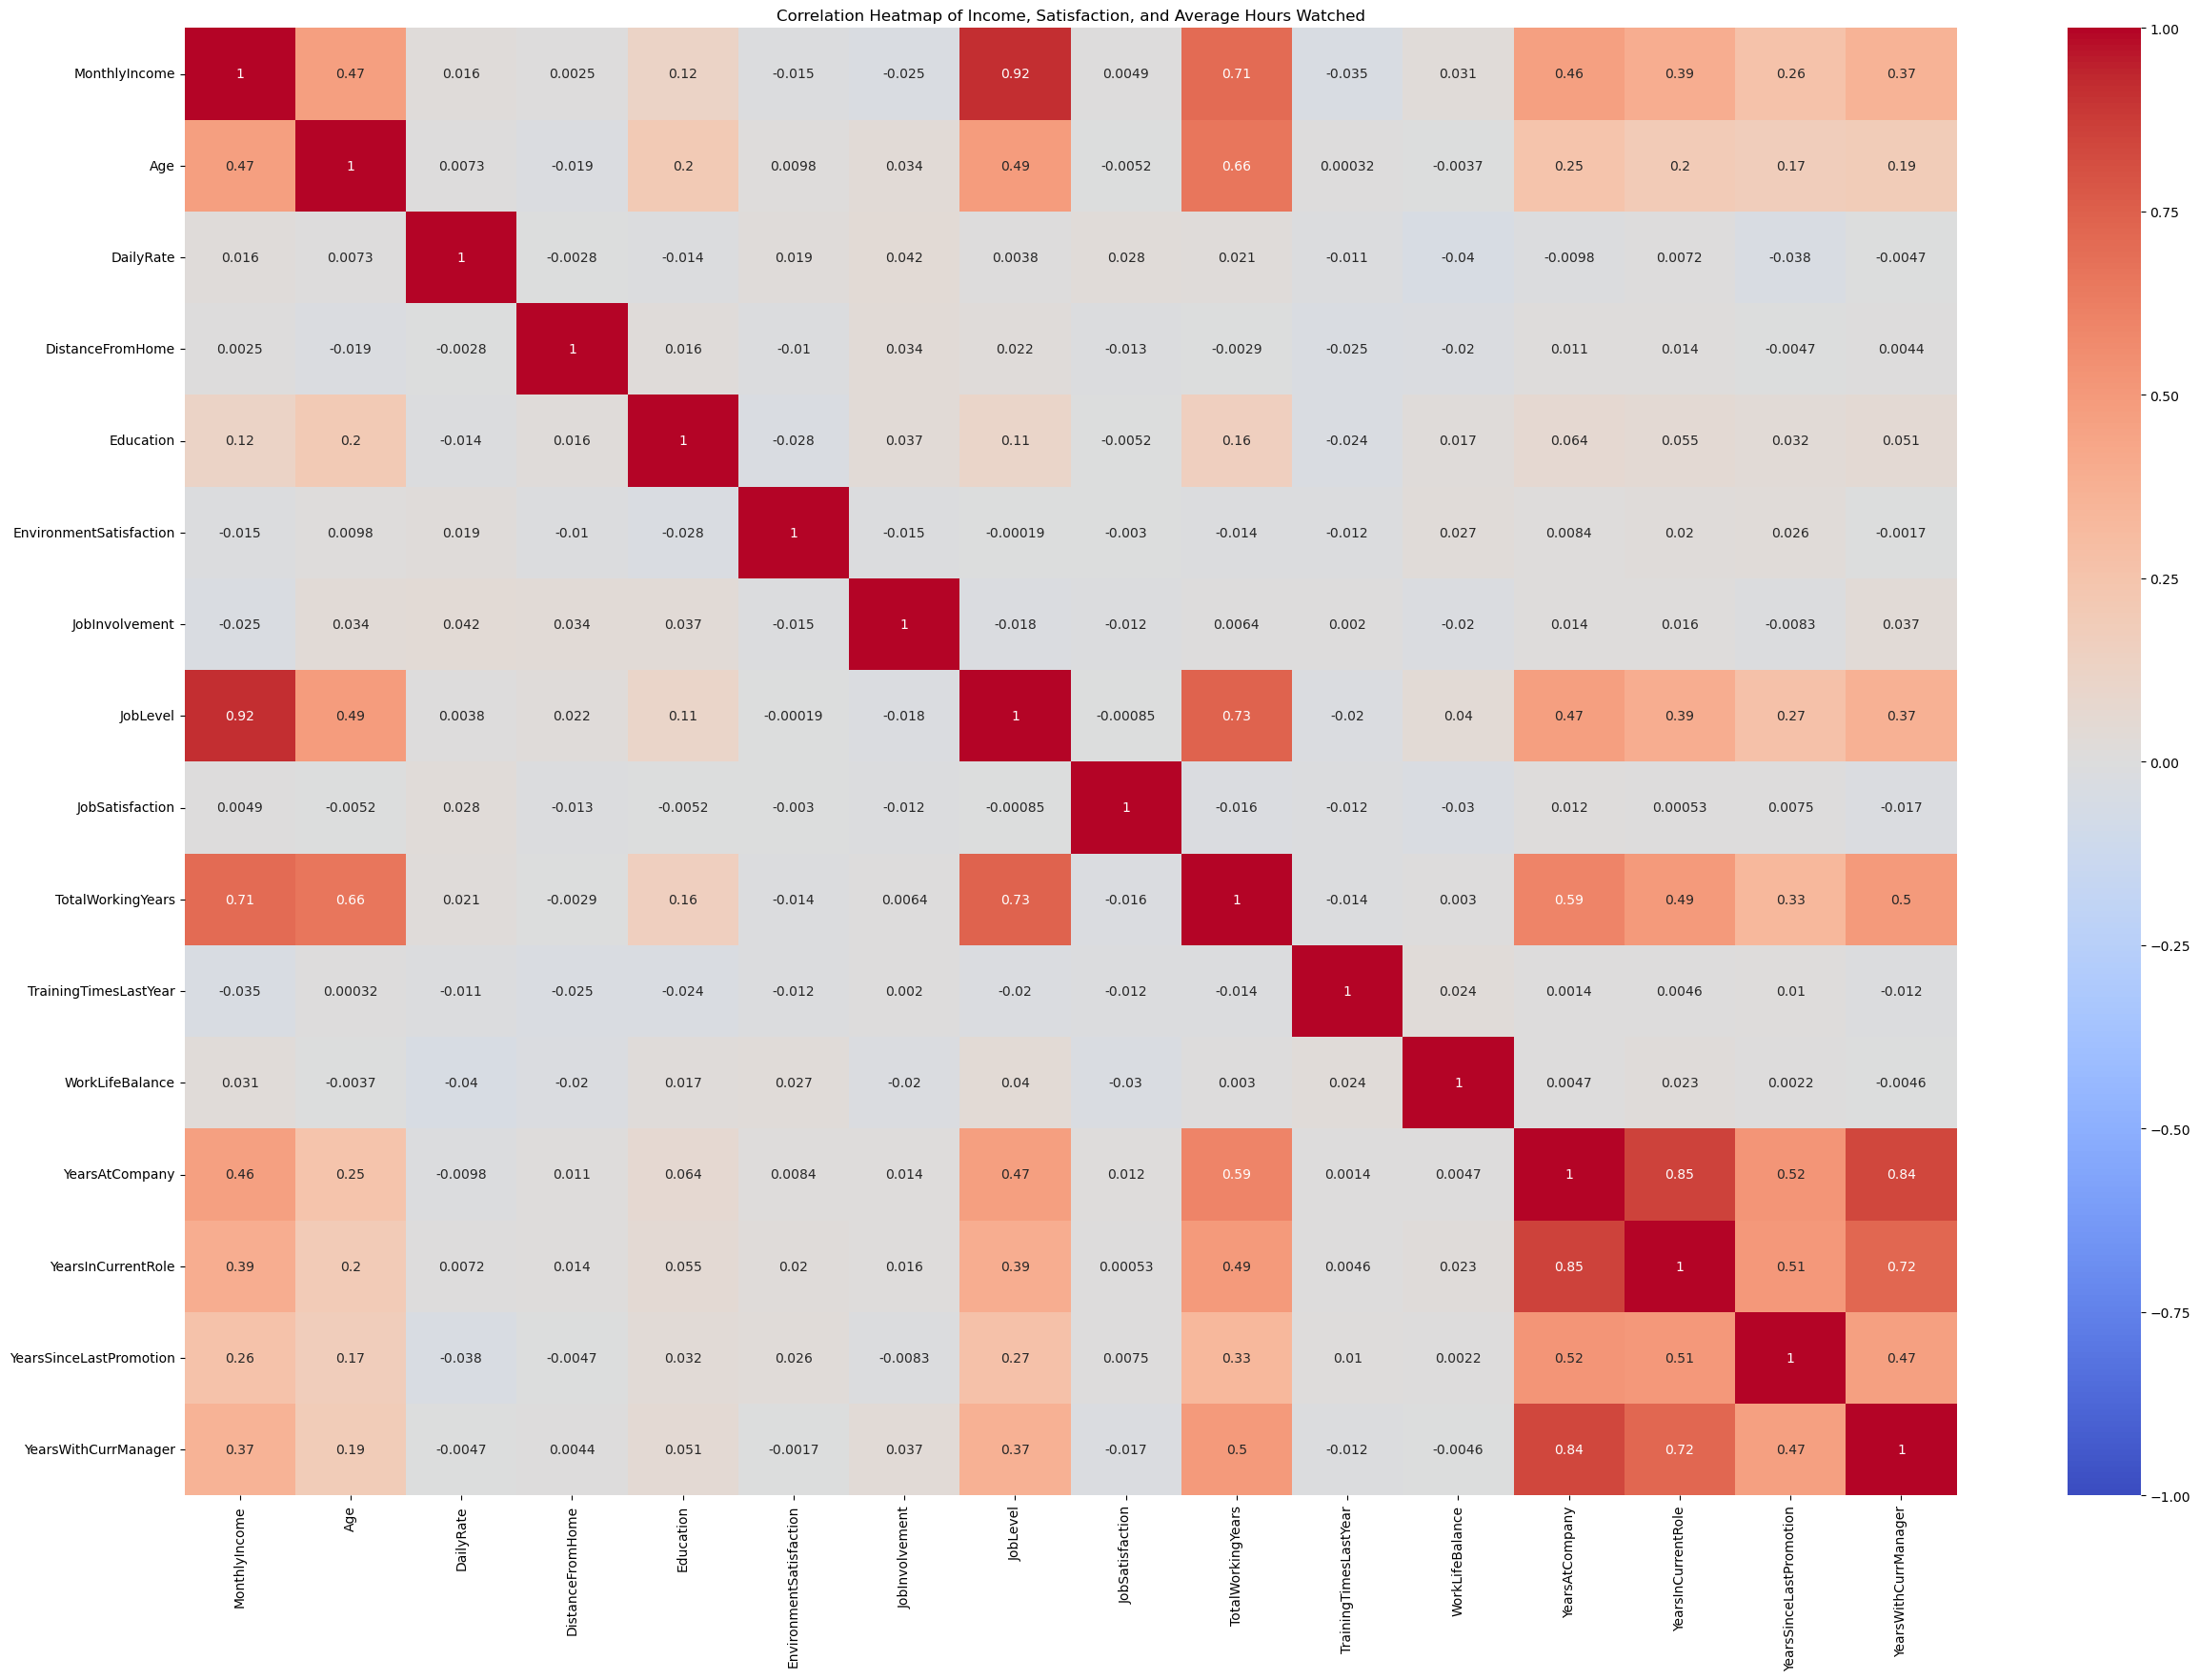

In [16]:
# Compute the Spearman correlation matrix
correlation_matrix = df[['MonthlyIncome', 'Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction','JobInvolvement','JobLevel', 'JobSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' ]].corr(method='spearman') # use pearson for Pearson correlation

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 20
                    ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title and labels
plt.title('Correlation Heatmap of Income, Satisfaction, and Average Hours Watched')

# 4. Method 1: Linear Regression 


H1: Controlling for demographics, education, performance and role, travel frequency have a positive effect on income? 

In [ ]:
# Developing an ordinary least squares regression model to analyse the effect of travel freqeuency on monthly income. To create an identical object we controlled for for demographics, education, per
model4 = smf.ols(formula= 'MonthlyIncome ~ JobRole + BusinessTravel + Age + Gender + Education + PerformanceRating', data=df)
results4 = model4.fit()

# Print the regression results summary
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     525.3
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:49:32   Log-Likelihood:                -13194.
No. Observations:                1470   AIC:                         2.642e+04
Df Residuals:                    1455   BIC:                         2.650e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Analysing the regression output

The regression output shows that our model is good at predicting the variance of the dependent model. About 83.5 % of variance is explained by the model. Although the coefficient of the intercept is 4686.5 no statement can be made about the intercept because it implies how much monthly income a person has when all predictors are zero. This would be applicable for someone who is of zero age, not employed by the company etc. 

The business travel variable highlights that someone who travels frequently makes about $476 more than someone who does not travel at all. This is statistically significant as the p value show. When looking at people who travel rarely there is no statistical significance as the p-value is above the 5% alpha. 

### Transformed models

In [ ]:
# In the exploratory data analysis we identified that the distribution of MonthlyIncome is right-skewed. To address this, we applied a log10 transformation to the MonthlyIncome variable to normalize its distribution. We then re-ran the regression analysis using this transformed variable as the dependent variable.
model5 = smf.ols(formula= 'MonthlyIncome_log10 ~ JobRole + BusinessTravel + Age + Gender + Education + PerformanceRating', data=df)
results5 = model5.fit()

# Print the regression results summary
print(results5.summary())

                             OLS Regression Results                            
Dep. Variable:     MonthlyIncome_log10   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.778
Method:                  Least Squares   F-statistic:                     369.0
Date:                 Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                         17:52:33   Log-Likelihood:                 855.38
No. Observations:                 1470   AIC:                            -1681.
Df Residuals:                     1455   BIC:                            -1601.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [86]:
# In the exploratory data analysis we identified that the distribution of MonthlyIncome is right-skewed. To address this, we applied a log2 transformation to the MonthlyIncome variable to normalize its distribution. We then re-ran the regression analysis using this transformed variable as the dependent variable.
model6 = smf.ols(formula= 'MonthlyIncome_log2 ~ JobRole + BusinessTravel + Age + Gender + Education + PerformanceRating', data=df)
results6 = model6.fit()

# Print the regression results summary
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:     MonthlyIncome_log2   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     369.0
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -909.42
No. Observations:                1470   AIC:                             1849.
Df Residuals:                    1455   BIC:                             1928.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

The regression outputs of the transformed models show that these models are not necessarily better. The lower r-squared highlight that the model is not better at explaining the variance of the dependent variable. 

## 1.2 Checking model assumptions

- Linearity 
- Homoscedasticity
- Normality of Residuals 
- No Multicollinearity 
- Independence of Errors 
- No Autocorrelation


#### Linearity

/Users/henrikpeuker/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Actual vs. Predicted')

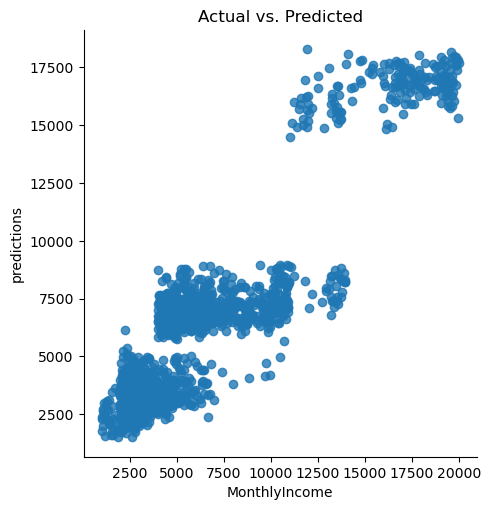

In [83]:
# making predictions
pred_insample = results4.predict() # or results.fittedvalues

# add predictions to the data frame
df['predictions'] = results4.predict()
df['residuals'] = results4.resid # computing residuals (i.e., actual - predicted values)

sns.lmplot(x='MonthlyIncome', y='predictions', data=df, fit_reg=False)        
plt.title('Actual vs. Predicted')

#### Homoscedasticity

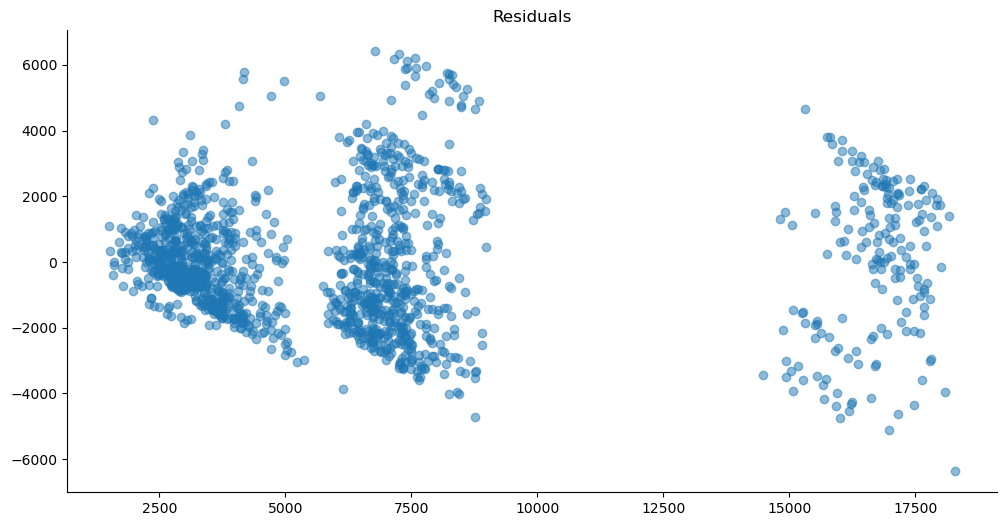

In [75]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df.predictions, y=df.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

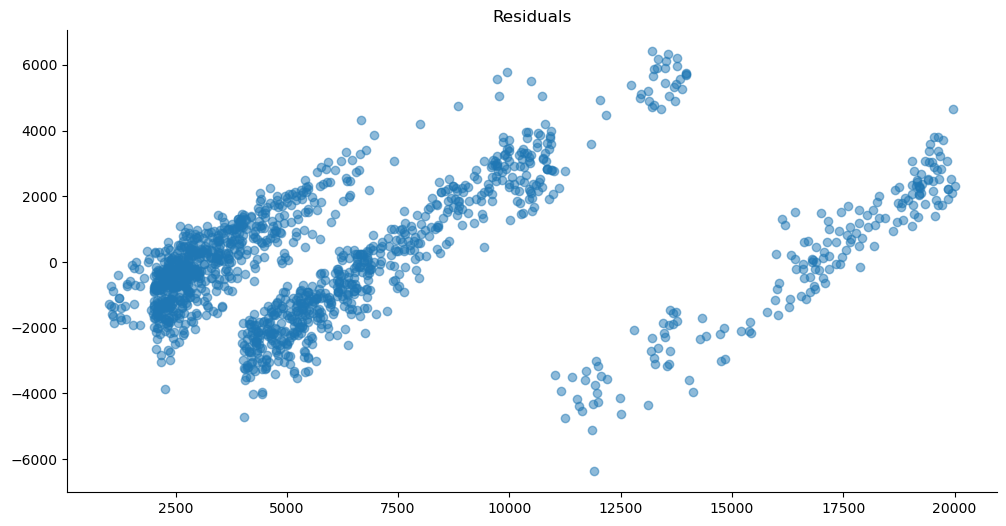

In [76]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df.MonthlyIncome, y=df.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

Heteroscedasticity robus standard errors 

In [84]:
model4 = smf.ols(formula= 'MonthlyIncome ~ JobRole + BusinessTravel + Age + Gender + Education + PerformanceRating', data=df)
results4 = model4.fit(cov_type='HC3')

# Print the regression results summary
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     494.3
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:54:15   Log-Likelihood:                -13194.
No. Observations:                1470   AIC:                         2.642e+04
Df Residuals:                    1455   BIC:                         2.650e+04
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

#### Normality of Residuals 

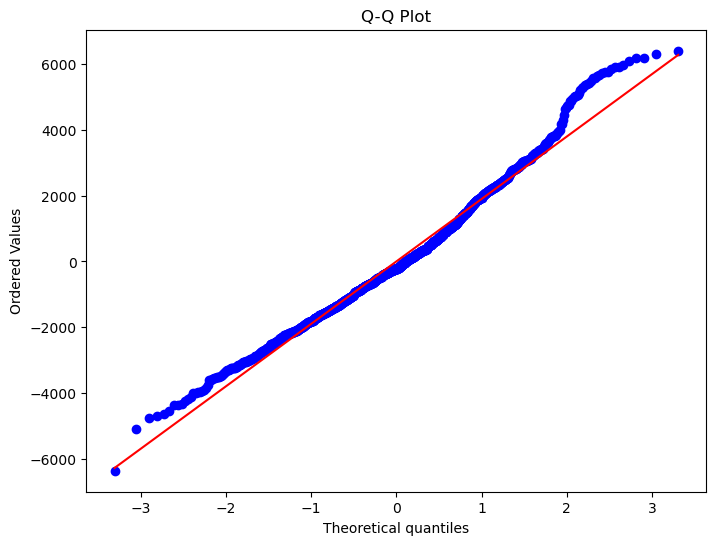

In [78]:
# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(df['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

### Multicollinearity


In [79]:
# Create a dataframe of independent variables
X = results4.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results4.model.exog_names

print(vif)

    VIF Factor                             features
0   128.291496                            Intercept
1     1.358541           JobRole[T.Human Resources]
2     2.525810     JobRole[T.Laboratory Technician]
3     1.706749                   JobRole[T.Manager]
4     1.908117    JobRole[T.Manufacturing Director]
5     1.539373         JobRole[T.Research Director]
6     2.662676        JobRole[T.Research Scientist]
7     2.739574           JobRole[T.Sales Executive]
8     1.619851      JobRole[T.Sales Representative]
9     2.328334  BusinessTravel[T.Travel_Frequently]
10    2.323643      BusinessTravel[T.Travel_Rarely]
11    1.014413                       Gender[T.Male]
12    1.277810                                  Age
13    1.054944                            Education
14    1.006283                    PerformanceRating


As we can see there is no noticable collinearity as all VIFs are below the threshold of 5.

### Independence of Errors (autocorrelation of errors)

In [80]:
# Perform the Durbin-Watson test
dw_test = durbin_watson(df['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 2.0384397655748305


There is no issue of autocorrelation in residuals as the Durbin Watson Test shows a value smaller than 2.5 but larger than 1.5. 

#### Conclusion 

After verifying all assumption, we can say that there is a violation of homoscedacisity. Therefore, we computed a robust model using the covariance type 'HC3'. 

# Method 2 

In [28]:
print(df['Department'].value_counts())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [29]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Assuming your data is in DataFrame df with columns 'Department' and 'MonthlyIncome'

# Welch ANOVA function (manual implementation)
def welch_anova(data, group_col, value_col):
    groups = data[group_col].unique()
    n = len(groups)
    group_stats = []
    for grp in groups:
        vals = data.loc[data[group_col] == grp, value_col]
        group_stats.append({'n':len(vals), 'mean':vals.mean(), 'var':vals.var(ddof=1)})
    numerator = sum([stat['n'] * stat['mean']**2 for stat in group_stats]) - (sum([stat['n'] * stat['mean'] for stat in group_stats])**2) / sum([stat['n'] for stat in group_stats])
    denominator = sum([stat['n'] * stat['var'] for stat in group_stats]) / sum([stat['n'] for stat in group_stats])
    F = numerator / denominator
    
    # Calculate degrees of freedom per Welch formula
    df_num = n - 1
    df_den = (3 * (sum([(stat['var']/stat['n'])**2 / (stat['n'] - 1) for stat in group_stats]))**-1)
    
    p = stats.f.sf(F, df_num, df_den)
    return F, p

F, p = welch_anova(df, 'Department', 'MonthlyIncome')
print(f"Welch ANOVA F={F:.3f}, p={p:.4f}")

# Pairwise Welch t-tests with Holm correction
groups = df['Department'].unique()
pairwise_results = []
pvals = []
comparisons = []

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        grp1 = df.loc[df['Department'] == groups[i], 'MonthlyIncome']
        grp2 = df.loc[df['Department'] == groups[j], 'MonthlyIncome']
        tstat, pval = stats.ttest_ind(grp1, grp2, equal_var=False)
        pvals.append(pval)
        comparisons.append(f"{groups[i]} vs {groups[j]}")
        pairwise_results.append({'comparison': f"{groups[i]} vs {groups[j]}", 't': tstat, 'p_uncorrected': pval})

# Adjust p-values using Holm method
reject, pvals_corrected, _, _ = multipletests(pvals, method='holm')
for i, res in enumerate(pairwise_results):
    res['p_holm'] = pvals_corrected[i]
    res['reject_null'] = reject[i]

# Display results
for res in pairwise_results:
    print(f"{res['comparison']}: t = {res['t']:.3f}, uncorrected p = {res['p_uncorrected']:.4f}, Holm-adjusted p = {res['p_holm']:.4f}, Reject null: {res['reject_null']}")


Welch ANOVA F=6.402, p=1.0000
Sales vs Research & Development: t = 2.725, uncorrected p = 0.0065, Holm-adjusted p = 0.0196, Reject null: True
Sales vs Human Resources: t = 0.404, uncorrected p = 0.6875, Holm-adjusted p = 1.0000, Reject null: False
Research & Development vs Human Resources: t = -0.500, uncorrected p = 0.6186, Holm-adjusted p = 1.0000, Reject null: False


In [30]:
low_job = df[df['Department']== 'Human Resources' ]
high_job = df[df['Department']== 'Sales' ]

# 2. Compute the population and sample mean

mean_low_job = low_job.MonthlyIncome.mean()
mean_high_job = high_job.MonthlyIncome.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="less") 

# 4. Print results
print(f"Sample Mean P: {mean_low_job:.2f}")
print(f"Sample Mean G: {mean_high_job:.2f}")

# One-sided greater
print("\nOne-Sided Test (P Mean > G Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# Two-sided less
print("\nOne-Sided Test (P Mean < G Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean P: 6654.51
Sample Mean G: 6959.17

One-Sided Test (P Mean > G Mean):
t-statistic greater: -0.53
p-value greater: 0.7003

One-Sided Test (P Mean < G Mean):
t-statistic less: -0.53
p-value less: 0.2997


In [31]:
low_job = df[df['Department']== 'Human Resources' ]
high_job = df[df['Department']== 'Research & Development' ]

# 2. Compute the population and sample mean

mean_low_job = low_job.MonthlyIncome.mean()
mean_high_job = high_job.MonthlyIncome.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="less") 

# 4. Print results
print(f"Sample Mean P: {mean_low_job:.2f}")
print(f"Sample Mean G: {mean_high_job:.2f}")

# One-sided greater
print("\nOne-Sided Test (P Mean > G Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# Two-sided less
print("\nOne-Sided Test (P Mean < G Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean P: 6654.51
Sample Mean G: 6281.25

One-Sided Test (P Mean > G Mean):
t-statistic greater: 0.58
p-value greater: 0.2813

One-Sided Test (P Mean < G Mean):
t-statistic less: 0.58
p-value less: 0.7187


In [32]:
# Split 'TrainingTimesLastYear' into equal-sized 'High' and 'Low' groups based on the median
training_median = df['TrainingTimesLastYear'].median()
df['Training_Group'] = np.where(df['TrainingTimesLastYear'] >= training_median, 'High', 'Low')

print(df['Training_Group'].value_counts())

Training_Group
High    798
Low     672
Name: count, dtype: int64


In [33]:
# 1. Identify both samples 
low_job = df[df['Training_Group']== 'High' ]
high_job = df[df['Training_Group']== 'Low' ]

# 2. Compute the population and sample mean

mean_low_job = low_job.MonthlyIncome.mean()
mean_high_job = high_job.MonthlyIncome.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="less") 

# 4. Print results
print(f"Sample Mean P: {mean_low_job:.2f}")
print(f"Sample Mean G: {mean_high_job:.2f}")

# One-sided greater
print("\nOne-Sided Test (P Mean > G Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# Two-sided less
print("\nOne-Sided Test (P Mean < G Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean P: 6404.68
Sample Mean G: 6619.60

One-Sided Test (P Mean > G Mean):
t-statistic greater: -0.87
p-value greater: 0.8083

One-Sided Test (P Mean < G Mean):
t-statistic less: -0.87
p-value less: 0.1917


In [34]:


# 1. Identify both samples 
low_job = df[df['JobLevel']== 1 ]
high_job = df[df['JobLevel']== 4 ]

# 2. Compute the population and sample mean


mean_low_job = low_job.MonthlyIncome.mean()
mean_high_job = high_job.MonthlyIncome.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(low_job.MonthlyIncome, high_job.MonthlyIncome, alternative="less") 

# 4. Print results
print(f"Sample Mean P: {mean_low_job:.2f}")
print(f"Sample Mean G: {mean_high_job:.2f}")

# One-sided greater
print("\nOne-Sided Test (P Mean > G Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# Two-sided less
print("\nOne-Sided Test (P Mean < G Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean P: 2786.92
Sample Mean G: 15503.78

One-Sided Test (P Mean > G Mean):
t-statistic greater: -119.47
p-value greater: 1.0000

One-Sided Test (P Mean < G Mean):
t-statistic less: -119.47
p-value less: 0.0000


In [35]:
# Group MonthlyIncome into 'High' and 'Low' based on the median
income_median = df['MonthlyIncome'].median()
df['Income_Group'] = np.where(df['MonthlyIncome'] >= income_median, 'High', 'Low')

print(df['Income_Group'].value_counts())

Income_Group
High    735
Low     735
Name: count, dtype: int64


In [36]:
sample_high = df[df['Income_Group']=='High']
sample_low = df[df['Income_Group']=='Low']

# 2. Compute the population and sample mean


sample_mean_p = sample_high.JobSatisfaction.mean()
sample_mean_g = sample_low.JobSatisfaction.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high.JobSatisfaction, sample_low.JobSatisfaction, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_low.JobSatisfaction, sample_high.JobSatisfaction, alternative="less") 

# 4. Print results

print(f"Sample Mean High Income: {sample_mean_p:.2f}")
print(f"Sample Mean Low Income: {sample_mean_g:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Income Mean > Low Income Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Income Mean < Low Income Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean High Income: 2.74
Sample Mean Low Income: 2.71

One-Sided Test (High Income Mean > Low Income Mean):
t-statistic greater: 0.50
p-value greater: 0.3098

One-Sided Test (High Income Mean < Low Income Mean):
t-statistic less: -0.50
p-value less: 0.3098


In [37]:
sample_high = df[df['Income_Group']=='High']
sample_low = df[df['Income_Group']=='Low']

# 2. Compute the population and sample mean


sample_mean_p = sample_high.EnvironmentSatisfaction.mean()
sample_mean_g = sample_low.EnvironmentSatisfaction.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high.EnvironmentSatisfaction, sample_low.EnvironmentSatisfaction, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_low.EnvironmentSatisfaction, sample_high.EnvironmentSatisfaction, alternative="less") 

# 4. Print results

print(f"Sample Mean High Income: {sample_mean_p:.2f}")
print(f"Sample Mean Low Income: {sample_mean_g:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Income Mean > Low Income Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Income Mean < Low Income Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean High Income: 2.71
Sample Mean Low Income: 2.73

One-Sided Test (High Income Mean > Low Income Mean):
t-statistic greater: -0.45
p-value greater: 0.6748

One-Sided Test (High Income Mean < Low Income Mean):
t-statistic less: 0.45
p-value less: 0.6748


In [38]:
sample_high = df[df['Income_Group']=='High']
sample_low = df[df['Income_Group']=='Low']

# 2. Compute the population and sample mean


sample_mean_p = sample_high.JobInvolvement.mean()
sample_mean_g = sample_low.JobInvolvement.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high.JobInvolvement, sample_low.JobInvolvement, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_low.JobInvolvement, sample_high.JobInvolvement, alternative="less") 

# 4. Print results

print(f"Sample Mean High Income: {sample_mean_p:.2f}")
print(f"Sample Mean Low Income: {sample_mean_g:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Income Mean > Low Income Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Income Mean < Low Income Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean High Income: 2.70
Sample Mean Low Income: 2.76

One-Sided Test (High Income Mean > Low Income Mean):
t-statistic greater: -1.43
p-value greater: 0.9235

One-Sided Test (High Income Mean < Low Income Mean):
t-statistic less: 1.43
p-value less: 0.9235


In [39]:
sample_high = df[df['Income_Group']=='High']
sample_low = df[df['Income_Group']=='Low']

# 2. Compute the population and sample mean


sample_mean_p = sample_high.RelationshipSatisfaction.mean()
sample_mean_g = sample_low.RelationshipSatisfaction.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high.RelationshipSatisfaction, sample_low.RelationshipSatisfaction, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_low.RelationshipSatisfaction, sample_high.RelationshipSatisfaction, alternative="less") 

# 4. Print results

print(f"Sample Mean High Income: {sample_mean_p:.2f}")
print(f"Sample Mean Low Income: {sample_mean_g:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Income Mean > Low Income Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Income Mean < Low Income Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean High Income: 2.75
Sample Mean Low Income: 2.68

One-Sided Test (High Income Mean > Low Income Mean):
t-statistic greater: 1.28
p-value greater: 0.1006

One-Sided Test (High Income Mean < Low Income Mean):
t-statistic less: -1.28
p-value less: 0.1006


In [40]:
sample_high = df[df['Income_Group']=='High']
sample_low = df[df['Income_Group']=='Low']

# 2. Compute the population and sample mean


sample_mean_p = sample_high.WorkLifeBalance.mean()
sample_mean_g = sample_low.WorkLifeBalance.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high.WorkLifeBalance, sample_low.WorkLifeBalance, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_low.WorkLifeBalance, sample_high.WorkLifeBalance, alternative="less") 

# 4. Print results

print(f"Sample Mean High Income: {sample_mean_p:.2f}")
print(f"Sample Mean Low Income: {sample_mean_g:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Income Mean > Low Income Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Income Mean < Low Income Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean High Income: 2.78
Sample Mean Low Income: 2.74

One-Sided Test (High Income Mean > Low Income Mean):
t-statistic greater: 0.92
p-value greater: 0.1781

One-Sided Test (High Income Mean < Low Income Mean):
t-statistic less: -0.92
p-value less: 0.1781


In [41]:
sample_high = df[df['Income_Group']=='High']
sample_low = df[df['Income_Group']=='Low']

# 2. Compute the population and sample mean


sample_mean_p = sample_high.WorkLifeBalance.mean()
sample_mean_g = sample_low.WorkLifeBalance.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high.WorkLifeBalance, sample_low.WorkLifeBalance, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_low.WorkLifeBalance, sample_high.WorkLifeBalance, alternative="less") 

# 4. Print results

print(f"Sample Mean High Income: {sample_mean_p:.2f}")
print(f"Sample Mean Low Income: {sample_mean_g:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Income Mean > Low Income Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Income Mean < Low Income Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean High Income: 2.78
Sample Mean Low Income: 2.74

One-Sided Test (High Income Mean > Low Income Mean):
t-statistic greater: 0.92
p-value greater: 0.1781

One-Sided Test (High Income Mean < Low Income Mean):
t-statistic less: -0.92
p-value less: 0.1781


In [42]:
# Define high and low income groups
income_threshold = df['MonthlyIncome'].median()
high_income = df[df['MonthlyIncome'] > income_threshold]
low_income = df[df['MonthlyIncome'] <= income_threshold]

# Variables to test
variables = [
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction'
]

# Run t-tests and print results
for var in variables:
    t_stat, p_val = stats.ttest_ind(high_income[var], low_income[var], alternative='two-sided')
    print(f"{var}: t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")


EnvironmentSatisfaction: t-statistic = -0.453, p-value = 0.6504
JobInvolvement: t-statistic = -1.430, p-value = 0.1529
JobSatisfaction: t-statistic = 0.497, p-value = 0.6196
PerformanceRating: t-statistic = -1.012, p-value = 0.3117
RelationshipSatisfaction: t-statistic = 1.279, p-value = 0.2012


In [43]:
income_threshold = df['JobLevel'].median()
high_income = df[df['JobLevel'] > income_threshold]
low_income = df[df['JobLevel'] <= income_threshold]

# Variables to test
variables = [
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'YearsAtCompany',
    'YearsWithCurrManager',
    'TotalWorkingYears'
]

# Run t-tests and print results
for var in variables:
    t_stat, p_val = stats.ttest_ind(high_income[var], low_income[var], alternative='two-sided')
    print(f"{var}: t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

EnvironmentSatisfaction: t-statistic = -0.413, p-value = 0.6800
JobInvolvement: t-statistic = -0.651, p-value = 0.5151
JobSatisfaction: t-statistic = -0.552, p-value = 0.5812
PerformanceRating: t-statistic = -0.395, p-value = 0.6927
RelationshipSatisfaction: t-statistic = 0.822, p-value = 0.4110
YearsAtCompany: t-statistic = 19.493, p-value = 0.0000
YearsWithCurrManager: t-statistic = 12.344, p-value = 0.0000
TotalWorkingYears: t-statistic = 34.445, p-value = 0.0000


In [44]:
income_threshold = df['JobSatisfaction'].median()
high_income = df[df['JobSatisfaction'] > income_threshold]
low_income = df[df['JobSatisfaction'] <= income_threshold]

# Variables to test
variables = [
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'YearsAtCompany',
    'YearsWithCurrManager',
    'TotalWorkingYears'
]

# Run t-tests and print results
for var in variables:
    t_stat, p_val = stats.ttest_ind(high_income[var], low_income[var], alternative='two-sided')
    print(f"{var}: t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

EnvironmentSatisfaction: t-statistic = 0.654, p-value = 0.5131
JobInvolvement: t-statistic = -0.557, p-value = 0.5779
JobSatisfaction: t-statistic = 47.302, p-value = 0.0000
PerformanceRating: t-statistic = 1.316, p-value = 0.1885
RelationshipSatisfaction: t-statistic = -0.256, p-value = 0.7979
YearsAtCompany: t-statistic = -0.191, p-value = 0.8489
YearsWithCurrManager: t-statistic = -0.355, p-value = 0.7226
TotalWorkingYears: t-statistic = -0.299, p-value = 0.7651


/Users/henrikpeuker/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [45]:
sample_high = df[df['EducationField']=='Marketing']
sample_low = df[df['EducationField']=='Technical Degree']

# 2. Compute the population and sample mean


sample_mean_p = sample_high.MonthlyIncome.mean()
sample_mean_g = sample_low.MonthlyIncome.mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high.MonthlyIncome, sample_low.MonthlyIncome, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_low.MonthlyIncome, sample_high.MonthlyIncome, alternative="less") 

# 4. Print results

print(f"Sample Mean High Income: {sample_mean_p:.2f}")
print(f"Sample Mean Low Income: {sample_mean_g:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Income Mean > Low Income Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Income Mean < Low Income Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Sample Mean High Income: 7348.58
Sample Mean Low Income: 5758.30

One-Sided Test (High Income Mean > Low Income Mean):
t-statistic greater: 3.23
p-value greater: 0.0007

One-Sided Test (High Income Mean < Low Income Mean):
t-statistic less: -3.23
p-value less: 0.0007


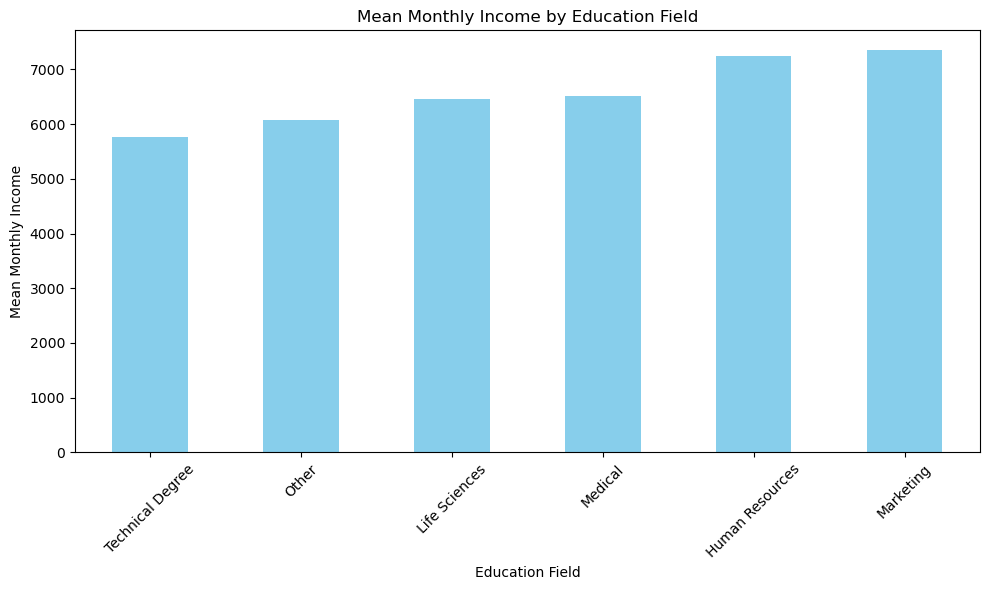

In [46]:
mean_income_by_educationfield = df.groupby('EducationField')['MonthlyIncome'].mean().sort_values()

plt.figure(figsize=(10, 6))
mean_income_by_educationfield.plot(kind='bar', color='skyblue')
plt.title('Mean Monthly Income by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Mean Monthly Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this code we do some basic exploratory analysis to get an overview of the data set. Firstly, we assess the data set to ensure we identified interesting variables. Next we checked for duplicates and missing values but could not find any. For text entries we used "Unknwon" and for numeric we used 0. Lastly, we have decided to drop columns that are not adding value in example "EmployeeCount", "StandardHours", "Over18". The entries in these columns are all the same and therefore do not add much value. 

H1. There is no difference in levels of attrition among low-travelers and high travelers.

In [47]:
logit_model_all = smf.logit('attrition_binary ~ MonthlyIncome + DistanceFromHome + BusinessTravel_Group + EnvironmentSatisfaction + JobSatisfaction', data=df).fit()

# Print the summary of the model
print(logit_model_all.summary())

PatsyError: Error evaluating factor: NameError: name 'attrition_binary' is not defined
    attrition_binary ~ MonthlyIncome + DistanceFromHome + BusinessTravel_Group + EnvironmentSatisfaction + JobSatisfaction
    ^^^^^^^^^^^^^^^^

##### Coefficients
Analysing the coefficients shows that the effect of business travel, monthly income, distance from home, environmnent and job satisfaction are all statistically significant. Lower business travel slightly reduces the odds of attrition (coef −0.753, z −4.47, p<0.001). Similarily higher income, slightly reduces risk of attrition (−0.0001, z −6.04, p<0.001). A greater distance from home increases attrition (coef 0.0268, z 3.09, p=0.002). Lastly, lower satisfaction increase the odds of attrition (coef −0.273, z −4.09, p<0.001)(−0.287, z −4.33, p<0.001). 

In [ ]:
# McFadden's pseudo R-squared
mcfadden_r2 = 1 - (logit_model_all.llf / logit_model_all.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2}")

#Cox & Snell R-Squared
n = len(df)  # number of observations
cox_snell_r2 = 1 - np.exp((logit_model_all.llnull - logit_model_all.llf) * 2 / n)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2}")

# Nagelkerke R-Squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(-logit_model_all.llnull * 2 / n))
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2}")

McFadden's pseudo R-squared: 0.08219637703371574
Cox & Snell pseudo R-squared: 0.07003787922084015
Nagelkerke pseudo R-squared: -0.04935423360907634


Our model has very low R-squared values which means it is not very useful for making prediction. However we can still use it for hypothesis testing. 

In [ ]:
# Predict using the null model (most frequent class)
most_frequent_class = df['attrition_binary'].mode()[0]

# Generate predictions for the null model (all predicted values are the most frequent class)
null_model_predictions = np.full_like(df['attrition_binary'], most_frequent_class)


# Predict probabilities using the logistic regression model
logit_predictions_prob = logit_model_all.predict()

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
logit_predictions_class = (logit_predictions_prob >= 0.5).astype(int)

In [ ]:


# Confusion matrix for the null model
null_conf_matrix = confusion_matrix(df['attrition_binary'], null_model_predictions)

# Confusion matrix for the logistic regression model
logit_conf_matrix = confusion_matrix(df['attrition_binary'], logit_predictions_class)

# Print the confusion matrices
print("Confusion Matrix for the Null Model:")
print(null_conf_matrix)

print("\nConfusion Matrix for the Logistic Regression Model:")
print(logit_conf_matrix)

Confusion Matrix for the Null Model:
[[1233    0]
 [ 237    0]]

Confusion Matrix for the Logistic Regression Model:
[[1232    1]
 [ 231    6]]


Altough we lose one true positive, we gain six true negatives. 

In [ ]:


odds_ratios = pd.DataFrame({
    'Variable': logit_model_all.params.index,
    'Odds Ratio': np.exp(logit_model_all.params.values)
})
print(odds_ratios)

                      Variable  Odds Ratio
0                    Intercept    2.470943
1  BusinessTravel_Group[T.Low]    0.470967
2                MonthlyIncome    0.999864
3             DistanceFromHome    1.027179
4      EnvironmentSatisfaction    0.760771
5              JobSatisfaction    0.750700


In [ ]:

from scipy.stats import chi2_contingency

# 1. Build the contingency table
contingency_table = pd.crosstab(
    df['Attrition'],
    df['BusinessTravel']
)

# 2. Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 3. Output the results
print("Contingency Table:")
print(contingency_table)

print(f"\nChi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

print("\nExpected Frequencies:")
print(pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
))

Contingency Table:
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156

Chi2 Statistic: 24.1824
P-Value: 0.0000
Degrees of Freedom: 2

Expected Frequencies:
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No              125.816327         232.340816     874.842857
Yes              24.183673          44.659184     168.157143


This implies that attrition and travel frequency are not unrelated. The contigency table shows that far fewer travelers choose to leave the company than if the observations were independent. And far more frequent travelers choose to leave the company. 

In [ ]:
# 1. Define low- and high-travel groups
low_travel = df['BusinessTravel'].isin(['Non-Travel', 'Travel_Rarely'])
high_travel = df['BusinessTravel'] == 'Travel_Frequently'

# 2. Count attriters in each group
count_low  = df.loc[low_travel,  'Attrition'].eq('Yes').sum()
nobs_low   = low_travel.sum()

count_high = df.loc[high_travel, 'Attrition'].eq('Yes').sum()
nobs_high  = high_travel.sum()

# 3. Perform two-proportions z-test (one-sided: low < high)
stat, pval = proportions_ztest(
    count  = [count_low, count_high],
    nobs    = [nobs_low,   nobs_high],
    alternative = 'smaller'
)

print(f"Low-travel attrition rate:  {count_low}/{nobs_low:.0f} = {count_low/nobs_low:.3f}")
print(f"High-travel attrition rate: {count_high}/{nobs_high:.0f} = {count_high/nobs_high:.3f}")
print(f"\nZ-statistic = {stat:.3f},  one-sided p-value = {pval:.4f}")


Low-travel attrition rate:  168/1193 = 0.141
High-travel attrition rate: 69/277 = 0.249

Z-statistic = -4.415,  one-sided p-value = 0.0000


Looking at the low p-value there is significant evidence that the high travel attrition rate is significantly higher than the low travel attrition rate. 

# 5. Method 2 

## 5.1 Creating the model

In [ ]:
print(summary_df)


                    Variable    Type
0                        Age   int64
1                  Attrition  object
2             BusinessTravel  object
3                  DailyRate   int64
4                 Department  object
5           DistanceFromHome   int64
6                  Education   int64
7             EducationField  object
8              EmployeeCount   int64
9             EmployeeNumber   int64
10   EnvironmentSatisfaction   int64
11                    Gender  object
12                HourlyRate   int64
13            JobInvolvement   int64
14                  JobLevel   int64
15                   JobRole  object
16           JobSatisfaction   int64
17             MaritalStatus  object
18             MonthlyIncome   int64
19               MonthlyRate   int64
20        NumCompaniesWorked   int64
21                    Over18  object
22                  OverTime  object
23         PercentSalaryHike   int64
24         PerformanceRating   int64
25  RelationshipSatisfaction   int64
2

In [ ]:
# Encode Attrition as 0/1
df['attrit_bin'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Fit logistic regression

model = smf.logit('attrit_bin ~ BusinessTravel + MaritalStatus + MonthlyIncome + DistanceFromHome + WorkLifeBalance + PerformanceRating + JobSatisfaction + EnvironmentSatisfaction', data=df).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.387370
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             attrit_bin   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1459
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Sep 2025   Pseudo R-squ.:                  0.1230
Time:                        09:41:34   Log-Likelihood:                -569.43
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.712e-29
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2907      0.852 

## 5.2 Interpreting the outcome 


### 5.2.1 Goodness-of-fit

### 5.2.2 Hypothesis testing

### 5.2.3 Odds ratio

In [ ]:
mcfadden_r2 = 1 - (model.llf / model.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2}")

#Cox & Snell R-Squared
n = len(df)  # number of observations
cox_snell_r2 = 1 - np.exp((model.llnull - model.llf) * 2 / n)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2}")

# Nagelkerke R-Squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(-model.llnull * 2 / n))
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2}")

McFadden's pseudo R-squared: 0.12299102823758878
Cox & Snell pseudo R-squared: 0.10295476977622797
Nagelkerke pseudo R-squared: -0.07255008025989275


#### Interpretation

We can argue that the model is not very useful for predictions due to the the low R-squared values. It can still be used for hypothesis testing. 

# 6. Reflection on the use of AI

We primarily used AI to help us solving issues. Our main contribution was finding the problems that require a solution. (...)

# 7. Conclusion